# <font style="color:blue">YOLOv4 Assignment</font>


# <font style="color:blue">1. Link Google Drive</font>
I found it easier to use Google Drive while training and testing, but let me knwo if you prefer a solution that doesn't need it

### <font style="color:green">Link google drive</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


# <font style="color:blue">2. Clone and build DarkNet repository </font>
Build darknet from source. These setps can be skipped if darknet is already available

In [3]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15490, done.
remote: Total 15490 (delta 0), reused 0 (delta 0), pack-reused 15490
Receiving objects: 100% (15490/15490), 14.09 MiB | 8.42 MiB/s, done.
Resolving deltas: 100% (10409/10409), done.
Checking out files: 100% (2057/2057), done.


In [4]:
%cd darknet

/content/drive/My Drive/darknet


In [5]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

print("Building. . . It might take 2-3 minutes")

!make &> build_log.txt

Building. . . It might take 2-3 minutes


# <font style="color:blue">3. Download config files</font>
This will download the class names and config files i did modify for training with the facemask dataset

In [6]:
!gdown "13rG8mQCe7XGQho8Q9YGjdSz1ixFRuTUg"
!gdown "1MnDl_ohEyYmLRHNOmccZChTBn6vt_F7P"
!gdown "1H7IJQ_jWJeJhYJ8jdKO1cCMpx-oOSrGV"
!gdown "1vIGuTDIPbxGpInYDhtc44iDmGQkcxel2"


Downloading...
From: https://drive.google.com/uc?id=13rG8mQCe7XGQho8Q9YGjdSz1ixFRuTUg
To: /content/drive/My Drive/darknet/yolov4-facemask-setup.data
100% 95.0/95.0 [00:00<00:00, 179kB/s]
Downloading...
From: https://drive.google.com/uc?id=1MnDl_ohEyYmLRHNOmccZChTBn6vt_F7P
To: /content/drive/My Drive/darknet/yolov4-test.cfg
100% 12.2k/12.2k [00:00<00:00, 20.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1H7IJQ_jWJeJhYJ8jdKO1cCMpx-oOSrGV
To: /content/drive/MyDrive/darknet/yolov4-train.cfg
100% 12.2k/12.2k [00:00<00:00, 21.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vIGuTDIPbxGpInYDhtc44iDmGQkcxel2
To: /content/drive/MyDrive/darknet/class.names
100% 11.0/11.0 [00:00<00:00, 20.2kB/s]


# <font style="color:blue">4. Download trained weigths</font>
These are the final weigths I did obtain after training

In [7]:
!gdown "1-1PgOd-rKreAFd81iWBoKnsKsLFvnHIe"

Downloading...
From: https://drive.google.com/uc?id=1-1PgOd-rKreAFd81iWBoKnsKsLFvnHIe
To: /content/drive/MyDrive/darknet/yolov4-train_last.weights
100% 256M/256M [00:02<00:00, 116MB/s]


# <font style="color:blue">5. Test images</font>
Use trained model for detection with the assignment images.

Utility function for display.

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

### <font style="color:green">5.1. Test Image 1</font>

In [9]:
!wget "https://www.dropbox.com/s/fxei8rit9v2n83s/test-image1.jpg?dl=1" -O test1.jpg

--2022-09-11 00:59:36--  https://www.dropbox.com/s/fxei8rit9v2n83s/test-image1.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/fxei8rit9v2n83s/test-image1.jpg [following]
--2022-09-11 00:59:36--  https://www.dropbox.com/s/dl/fxei8rit9v2n83s/test-image1.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucca39ed02eda15fad4ae3957fce.dl.dropboxusercontent.com/cd/0/get/BsuOJIsBNJuwSLqAy0E1kExsazwvA6T8huujHz-ewgNxxMOUoBxRCdCaI2pCnABapZcYJGe2qij1dAUFClDephSCcGBPnKPerwSZAvypuptWnFwgb8rnWkNOccNVvRWEb8c-VFqPoZtEp-Ia61FWvS9bCxIWmujus1qCWGzjWy0HhVjSppGIdHhXvTq_7eJobuc/file?dl=1# [following]
--2022-09-11 00:59:36--  https://ucca39ed02eda15fad4ae3957fce.dl.dropboxusercontent.com/cd/0/get/BsuOJIsBNJuwSLqAy0E1kExsazwvA6T8huujHz-ewgNxx

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/

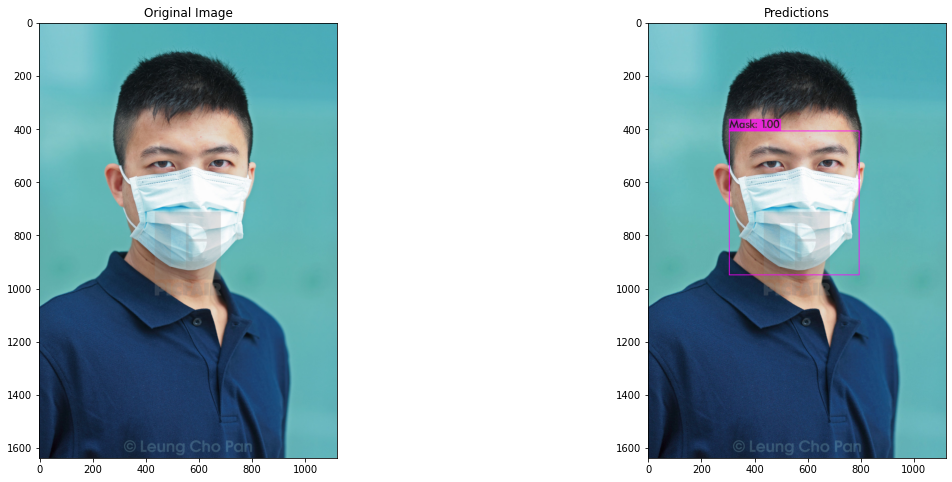

In [10]:
!./darknet detector test yolov4-facemask-setup.data yolov4-test.cfg yolov4-train_last.weights test1.jpg -thresh .6
display_output("test1.jpg")

We can see that the Ambulance from our previous example is now getting detected. 

Let us see some more examples!

### <font style="color:green">5.2. Test Image 2</font>

In [11]:
!wget "https://www.dropbox.com/s/ia1fijzr69ytpp1/test-image2.jpg?dl=1" -O test2.jpg

--2022-09-11 00:59:57--  https://www.dropbox.com/s/ia1fijzr69ytpp1/test-image2.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/ia1fijzr69ytpp1/test-image2.jpg [following]
--2022-09-11 00:59:57--  https://www.dropbox.com/s/dl/ia1fijzr69ytpp1/test-image2.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc9a83d2162a898ef967666d454.dl.dropboxusercontent.com/cd/0/get/BsteAx2Fx-GowXQOs7pao7RdyikJO2a45GwTFaMdRFrgwd1UPRBMXIC-p8iJGO4Ql5WQjZaACgR631jsxMgivizagu0pAAibEj-dPKzQZQbl3ZrPXiBWR9y852AQ3424O7ML1t-riGOsXM2GKQkiC9H_RI8VPMeoXRysfoUhUahbS6kOGgFEmZVYSKgrRw2lDi4/file?dl=1# [following]
--2022-09-11 00:59:58--  https://ucc9a83d2162a898ef967666d454.dl.dropboxusercontent.com/cd/0/get/BsteAx2Fx-GowXQOs7pao7RdyikJO2a45GwTFaMdRFrgw

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/

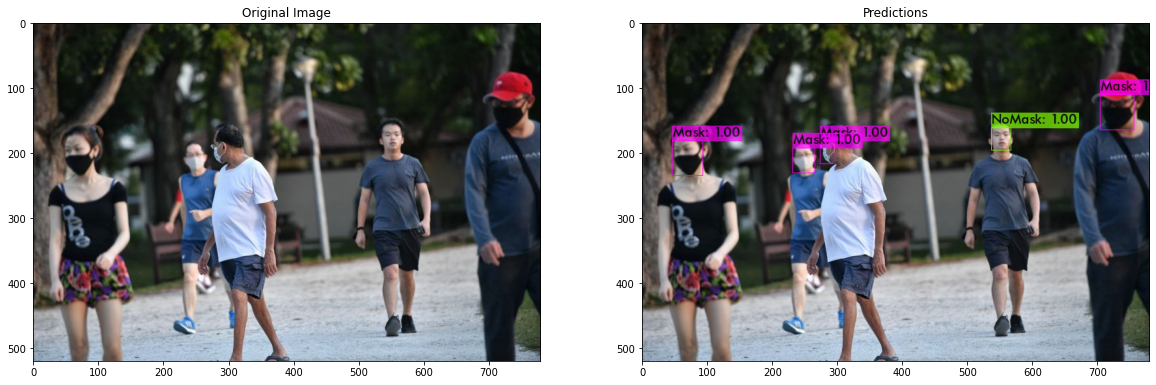

In [12]:
!./darknet detector test yolov4-facemask-setup.data yolov4-test.cfg yolov4-train_last.weights test2.jpg -thresh .6
display_output("test2.jpg")

### <font style="color:green">5.3. Test Image 3</font>

In [13]:
!wget "https://www.dropbox.com/s/g905k4r1git5kbx/test-image3.jpg?dl=1" -O test3.jpg

--2022-09-11 01:00:26--  https://www.dropbox.com/s/g905k4r1git5kbx/test-image3.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/g905k4r1git5kbx/test-image3.jpg [following]
--2022-09-11 01:00:26--  https://www.dropbox.com/s/dl/g905k4r1git5kbx/test-image3.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc51aa8a14bc099b37dbd06c79d1.dl.dropboxusercontent.com/cd/0/get/BssmyBxgZt1Hb_9Fg8tsqjue7N1ISoXzViuCyoW_p_YFySIs8K0NDkGA65fa5AQq7_m7AgpknG8F0P4FcWhysqSfwlOmU3FibLT-dLIPsWBbQRK2OOe7XmunlT38xb7LaILbuMRr-p_Wf0uh4Fn6cPh7PFH6GgjCUbUvCNj0ARLtBKbSGuhknkfcMjot1k-ZogQ/file?dl=1# [following]
--2022-09-11 01:00:26--  https://uc51aa8a14bc099b37dbd06c79d1.dl.dropboxusercontent.com/cd/0/get/BssmyBxgZt1Hb_9Fg8tsqjue7N1ISoXzViuCyoW_p_YFy

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/

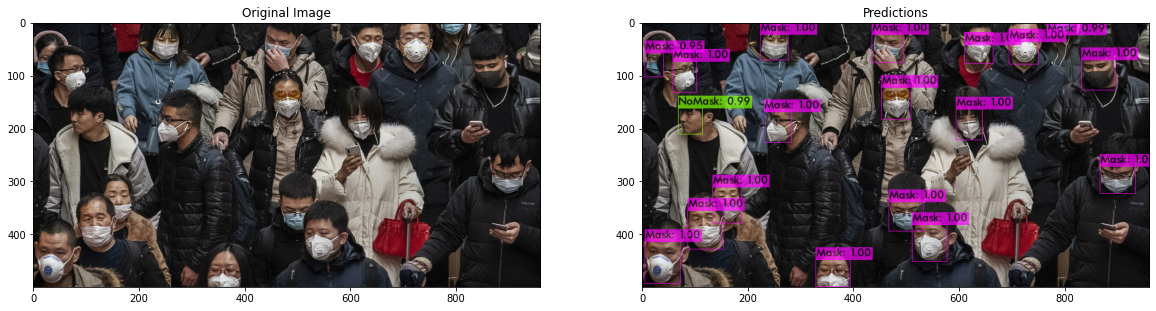

In [14]:
!./darknet detector test yolov4-facemask-setup.data yolov4-test.cfg yolov4-train_last.weights test3.jpg -thresh .6
display_output("test3.jpg")

### <font style="color:green">5.4. Test Image 4</font>

In [15]:
!wget "https://www.dropbox.com/s/90ggmiur7b8g35m/test-image4.jpg?dl=1" -O test4.jpg

--2022-09-11 01:00:51--  https://www.dropbox.com/s/90ggmiur7b8g35m/test-image4.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/90ggmiur7b8g35m/test-image4.jpg [following]
--2022-09-11 01:00:51--  https://www.dropbox.com/s/dl/90ggmiur7b8g35m/test-image4.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc80b866a95f9577470b357f2dbb.dl.dropboxusercontent.com/cd/0/get/Bsu3jVYbzH20GZSWKZ6Ftbj3qlvA5Fbpph5dkugVdhruPKyVj76mnPMcC_NeMipEiTS54xWT7YNAF-dVPm02zOSJdG0d6kiED0F6rqgLL-tqtRmMlnBTsCK0-jIkpnPcOJh-BKBKdFU1jJHjFF-P6eMfAJDAxluwzvgTSRbACtJ2bOFlTYhUQ7SO-Vv4Ni45_vE/file?dl=1# [following]
--2022-09-11 01:00:51--  https://uc80b866a95f9577470b357f2dbb.dl.dropboxusercontent.com/cd/0/get/Bsu3jVYbzH20GZSWKZ6Ftbj3qlvA5Fbpph5dkugVdhruP

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/

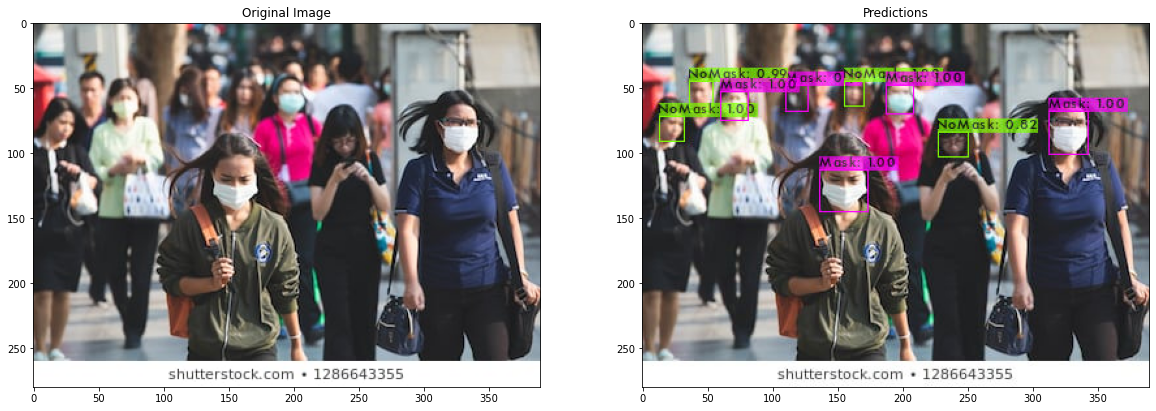

In [16]:
!./darknet detector test yolov4-facemask-setup.data yolov4-test.cfg yolov4-train_last.weights test4.jpg -thresh .6
display_output("test4.jpg")

### <font style="color:green">5.5. Test Video 1</font>
Result for test video will be output in the darknet folder. The results can be reproduced with the visualizer in google drive. It could take some time for the video to be processed in google drive. The pre-processed rsult is available here: https://youtu.be/fUmX4qYnkiU

In [17]:
!wget "https://www.dropbox.com/s/pds0w3z5y7w89oz/test-video1.mp4?dl=1" -O test-video1.mp4

--2022-09-11 01:02:33--  https://www.dropbox.com/s/pds0w3z5y7w89oz/test-video1.mp4?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/pds0w3z5y7w89oz/test-video1.mp4 [following]
--2022-09-11 01:02:33--  https://www.dropbox.com/s/dl/pds0w3z5y7w89oz/test-video1.mp4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb8d668d0ebad4095dee33220c5.dl.dropboxusercontent.com/cd/0/get/Bssj6-AiqZOwFRx64ALLqZr99oxr9lfA6ZC-jxOOZO7nxA6Bc11lUJZhkRrpGgfbJG_LoENIl59Q9SZztQ247xYuSmDQ8_N1eqxvFOLlkXpJcUfXT6iTQu7g9htx2Z4MC2JOBM8hvkw5kH3M5FYpG_da6dIoo1QsnH-35F3ieBBIFA2NO67kofp1IP4rXH-RJTo/file?dl=1# [following]
--2022-09-11 01:02:34--  https://ucb8d668d0ebad4095dee33220c5.dl.dropboxusercontent.com/cd/0/get/Bssj6-AiqZOwFRx64ALLqZr99oxr9lfA6ZC-jxOOZO7nx

In [18]:
!./darknet detector demo yolov4-facemask-setup.data yolov4-test.cfg yolov4-train_last.weights -dont_show test-video1.mp4 -i 0 -out_filename out_test-video1.mp4 -thresh .6

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Objects:

NoMask: 100% 
NoMask: 100% 
Mask: 100% 
Mask: 99% 
Mask: 80% 

FPS:27.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 100% 
NoMask: 100% 
Mask: 100% 
Mask: 98% 
Mask: 84% 

FPS:27.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 100% 
NoMask: 100% 
Mask: 100% 
Mask: 98% 
Mask: 78% 

FPS:27.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 100% 
NoMask: 99% 
NoMask: 88% 
Mask: 100% 
Mask: 93% 
Mask: 92% 

FPS:27.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 100% 
NoMask: 90% 
Mask: 100% 
Mask: 99% 
Mask: 96% 
Mask: 76% 

FPS:26.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 98% 
Mask: 95% 

FPS:25.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 99% 

FPS:25.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 99% 
Mask: 95% 

FPS:26.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Mask: 100% 


### <font style="color:green">5.6. Test Video 2</font>
Same as before, output will be avialable in darknet folder in google drive. Also the pre-processed result can be found here: https://youtu.be/64327kAwAKo

In [19]:
!wget "https://www.dropbox.com/s/sqwu0ktdtlxtdsd/test-video2.mp4?dl=1" -O test-video2.mp4

--2022-09-11 01:05:59--  https://www.dropbox.com/s/sqwu0ktdtlxtdsd/test-video2.mp4?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/sqwu0ktdtlxtdsd/test-video2.mp4 [following]
--2022-09-11 01:05:59--  https://www.dropbox.com/s/dl/sqwu0ktdtlxtdsd/test-video2.mp4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2d7812fbf6188b511cb8a86ac4.dl.dropboxusercontent.com/cd/0/get/Bss5b_ugT9XArYNqiwhuOy9u9-yFS_Tof3sY9Q59xVr4sfvuYgicmD9oDe9mdO7PGwgqrzxUj94XJZHX0rfFqS5_wCbhj7LRyfo0yGim05KuXOxKUOmbX5vlcaSGOVr2gZ4-5IZdWzyj8kjkk6HP0rofVSrO4bKJQUNReYYVdSRxJt_Br-D2nkTb3jyJwmMzpMk/file?dl=1# [following]
--2022-09-11 01:05:59--  https://uc2d7812fbf6188b511cb8a86ac4.dl.dropboxusercontent.com/cd/0/get/Bss5b_ugT9XArYNqiwhuOy9u9-yFS_Tof3sY9Q59xVr4s

In [20]:
!./darknet detector demo yolov4-facemask-setup.data yolov4-train.cfg yolov4-train_last.weights -dont_show test-video2.mp4 -i 0 -out_filename out_test-video2.mp4 -thresh .6


Se truncaron las últimas líneas 5000 del resultado de transmisión.
 cvWriteFrame 
Objects:

NoMask: 100% 
NoMask: 97% 
NoMask: 94% 
NoMask: 73% 
NoMask: 72% 
NoMask: 61% 
Mask: 100% 

FPS:26.6 	 AVG_FPS:25.1

 cvWriteFrame 
Objects:

NoMask: 100% 
NoMask: 98% 
NoMask: 95% 
NoMask: 88% 
NoMask: 66% 
NoMask: 63% 
Mask: 100% 

FPS:26.5 	 AVG_FPS:25.1

 cvWriteFrame 
Objects:

NoMask: 99% 
NoMask: 96% 
NoMask: 94% 
NoMask: 86% 
NoMask: 84% 
NoMask: 65% 
NoMask: 60% 
Mask: 100% 

FPS:26.5 	 AVG_FPS:25.1

 cvWriteFrame 
Objects:

NoMask: 97% 
NoMask: 94% 
NoMask: 90% 
NoMask: 87% 
NoMask: 82% 
NoMask: 75% 
Mask: 99% 

FPS:27.1 	 AVG_FPS:25.1

 cvWriteFrame 
Objects:

NoMask: 97% 
NoMask: 95% 
NoMask: 88% 
NoMask: 87% 
NoMask: 78% 
NoMask: 68% 
Mask: 99% 

FPS:27.7 	 AVG_FPS:25.1

 cvWriteFrame 
Objects:

NoMask: 99% 
NoMask: 96% 
NoMask: 93% 
NoMask: 89% 
NoMask: 86% 
Mask: 100% 
Mask: 71% 

FPS:28.2 	 AVG_FPS:25.1

 cvWriteFrame 
Objects:

NoMask: 96% 
NoMask: 93% 
NoMask: 91% 
NoMask: 90% 